# Group Challenge– Convolutional Neural Networ k Classification Challenge

### A(CNN) model for automatic COVID-19 detection using raw chest X-ray images
 
Model by Flint Isaac 
flintisaac@gmail.com
+263776171372
                                


 ![](./img/corona11.jpg)

# Abstract 
As indicated by the World Health Organization (WHO), the coronavirus (COVID-19) pandemic is putting 
indeed, even the best Healthcare Sytems  over the world under enormous tension. The early recognition of 
this sort of infection will help in mitigating the pressure of the Healthcare systems. Chest X-rays has been 
assuming an essential job in the finding of infections like Pneumonia. As COVID-19 is a kind of flu, it 
is conceivable to analyze utilizing this imaging procedure. With quick improvement in the area of Machine 
Learning (ML) and Deep learning, i came up with   clever Convolutional Neural Network systems to classify between COVID-19,Pneumonia and No-COVID-19 patients.This study proposes a machine Learning based  classification of extracted deep feature using VGG16 model  with COVID-19 and Pnemonia patients on Chest X-ray images. The model is achieving accuracy:  0.9900 and a loss of  0.0341



![](./img/scan.jpg)

# Introduction
COVID-19, regularly alluded to as coronavirus has risen as a lethal SARS infection over a year now. With the spot of origin  being recognized as Wuhan, China. The infection presently remains as
being pronounced 'pandemic' by the World Health Organization (WHO). The symptoms of  the desease 
look like a typical viral, respiratory disease with a incubation  time of 214 days. In any case, as this illness 
advances, the affected experiences shortness of breath , nausia culminating in pneumonia and various
organ failure.Given the destructive and crippling condition that it is, the whole world presently is at high alarm with thousands of cases being recognized every day. Passing by WHO measurements, starting at now, there have been about 19,432,244 confirmed cases with over 721,594 deaths have been recorded today. Acording to Zimbabwe Ministry of Health and Child Care, Zimbabwe recorded its first case on 20 March 2020. As of 05/08/2020 it has recorded  43339 cases ,1264 have recovered  and 84 deaths.

![](./img/zim.jpg) 


# Choice of Our CNN Model  Architecture/Transfer learning Architecture


### Transfer learning
Due to the uncommon availability of a huge medical image dataset, training our entire convolutional neural network (CNN) model by medical images to achieve a good classification accuracy is unlikely often. Therefore, i random initialize weights by using exist CNN model (VGG16) that has been already trained on a large dataset which we called basemodel..

What is VGG-16 ?
VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous models submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPUs.
The input to the cov1 layer is of a fixed size 224 x 224 RGB image. The image is passed through a stack of convolutional (conv.) layers, where the filters were used with a very small receptive field: 3×3 (which is the smallest size to capture the notion of left/right, up/down, center). In one of the configurations, it also utilizes 1×1 convolution filters, which can be seen as a linear transformation of the input channels (followed by non-linearity). The convolution stride is fixed to 1 pixel; the spatial padding of Conv. layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 1-pixel for 3×3 Conv. layers. Spatial pooling is carried out by five max-pooling layers, which follow some of the Conv. layers (not all the conv. layers are followed by max-pooling). Max-pooling is performed over a 2×2 pixel window, with stride 2.
Three Fully-Connected (FC) layers follow a stack of convolutional layers (which has a different depth in different architectures): the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer. The configuration of the fully connected layers is the same in all networks.
The image below depicts the architecture of the VGG 16 model.



![](./img/vgg16.png) 








Please note,there is VGG−19 neural network which is bigger than VGG−16, but because VGG−16 does almost the same as the VGG−19 we choose to use VGG−16. There is not much difference between VGG16 and VGG19 except the depth of the layers in the convolutional neural network

##  Model Architecture

![](./img/model.jpg) 







In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
#from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications.ResNet50 import ResNet50
#from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image
import cv2

In [2]:
pip install lime

     |████████████████████████████████| 276kB 9.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=4938b8b0d9651d4021053d3ae185ca7532349bc137bddc73b28b1bdea25445e2
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [4]:
pip install opencv-contrib-python 

In [ ]:
#baseModel = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
#for layer in baseModel.layers:
#  layer.trainable = False

#headModel = baseModel.output
#headModel = AveragePooling2D()(headModel)
#headModel = Flatten()(headModel)
#headModel = Dense(128, activation="relu")(headModel)
#headModel = Dropout(0.2)(headModel)
#headModel = Dense(3, activation='softmax')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

58892288/58889256 [==============================] - 2s 0us/step


# CNN transfer- learning from VGG16 model



In [36]:
V16_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in V16_model.layers:
  layer.trainable = False


# Building  New model using Output of VGG16 basemodel

In [37]:
New_model = V16_model.output

### Applying Max pooling and flattening   to the output of  the transfered model (VGG16)

In [38]:
New_model = AveragePooling2D()(New_model )
New_model = Flatten()(New_model)       # extracting input for the fully connected layer

# fully connected layer

In [39]:
New_model  = Dense(256, activation="relu")(New_model )
New_model  = Dense(256, activation="relu")(New_model )
New_model  = Dropout(0.50)(New_model )
New_model  = Dense(3, activation='softmax')(New_model )
model = Model(inputs=V16_model.input, outputs=New_model )

In [40]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [41]:
from tensorflow.keras.optimizers import Adam
#optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)#lr is learning rate momentum the rate to move down
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)# rescaling the image to a specific range

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/vision/training',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                shuffle = True) # if it is more you will use categorically instead of binary

Found 900 images belonging to 3 classes.


In [46]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/vision/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 225 images belonging to 3 classes.


In [47]:
from IPython.display import display

In [48]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [49]:
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              callbacks=[es, mc],
                              epochs=550)

Epoch 1/550
57/57 [==============================] - 30s 529ms/step - loss: 0.9877 - accuracy: 0.5011 - val_loss: 0.8657 - val_accuracy: 0.6089
Epoch 2/550
57/57 [==============================] - 30s 528ms/step - loss: 0.8930 - accuracy: 0.5800 - val_loss: 0.7647 - val_accuracy: 0.6667
Epoch 3/550
57/57 [==============================] - 30s 523ms/step - loss: 0.8306 - accuracy: 0.5922 - val_loss: 0.6582 - val_accuracy: 0.7244
Epoch 4/550
57/57 [==============================] - 29s 508ms/step - loss: 0.7223 - accuracy: 0.6767 - val_loss: 0.5835 - val_accuracy: 0.7511
Epoch 5/550
57/57 [==============================] - 30s 530ms/step - loss: 0.6879 - accuracy: 0.6789 - val_loss: 0.5714 - val_accuracy: 0.7689
Epoch 6/550
57/57 [==============================] - 31s 541ms/step - loss: 0.6547 - accuracy: 0.7044 - val_loss: 0.4755 - val_accuracy: 0.8178
Epoch 7/550
57/57 [==============================] - 30s 529ms/step - loss: 0.6249 - accuracy: 0.7267 - val_loss: 0.4672 - val_accuracy:

In [54]:
import sys
sys.path.append("/content/drive/My Drive")
model.save("/content/drive/My Drive/ CNN_Covid19_Classifier_Pro.h5")
print("Saved model to disk")

Saved model to disk


In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation loss')

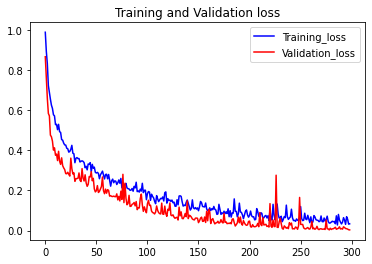

In [56]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation Accuracy')

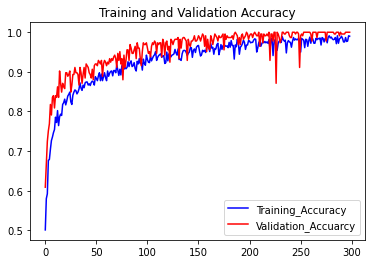

In [57]:
plt.plot(epochs,acc,label='Training_Accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation_Accuarcy',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

In [58]:
class_dict = {0:'COVID19',
              1:'No-COVID-19',
              2:'PNEUMONIA'}

In [28]:
import cv2

prediction:  COVID19


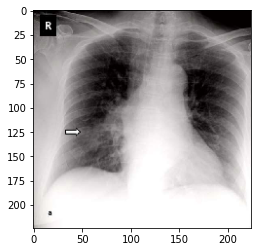

In [59]:
file_path = '/content/drive/My Drive/vision/test/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png'
test_image = cv2.imread( file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [60]:
def find_true_class(file_path):
    true_class = None
    if 'Covid-19' in file_path:
        true_class = 'COVID19'
    elif 'No_Covid-19' in file_path:
        true_class = 'No-COVID-19'
    elif 'Pneumonia' in file_path:
        true_class = 'PNEUMONIA'
        return true_class

In [61]:
def visualize(file_path,ax,text_loc):
    test_image = cv2.imread(file_path)
    test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
    test_image = np.expand_dims(test_image,axis=0)
    probs = model.predict(test_image)
    pred_class = np.argmax(probs)
    pred_class = class_dict[pred_class]

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(test_image[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


    ax.imshow(mark_boundaries(temp, mask))
    fig.text(text_loc, 0.9, "Predicted Class: " + pred_class , fontsize=13)
    true_class = find_true_class(file_path)
    if true_class is not None:
        fig.text(text_loc, 0.86, "Actual Class: " + true_class , fontsize=13)

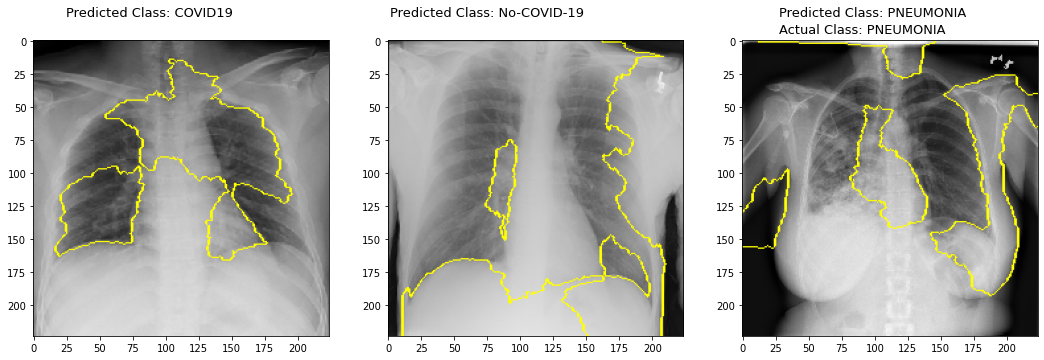

In [62]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
visualize('/content/drive/My Drive/vision/test/Covid-19/1-s2.0-S1684118220300682-main.pdf-002-a1.png',ax[0],0.15)
visualize('/content/drive/My Drive/vision/test/No_Covid-19/00001389_001.png',ax[1],0.4)
visualize('/content/drive/My Drive/vision/test/Pneumonia/00000261_007.png',ax[2],0.7)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set , 225 // 16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set .classes, y_pred))
print('Classification Report')
target_names = ['Covid-19', 'No_Covid-19', 'Pneumonia']
print(classification_report(test_set .classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 25   0   0]
 [  0 100   0]
 [  0   0 100]]
Classification Report
              precision    recall  f1-score   support

    Covid-19       1.00      1.00      1.00        25
 No_Covid-19       1.00      1.00      1.00       100
   Pneumonia       1.00      1.00      1.00       100

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



## References
1. World Health Organization; Naming the coronavirus disease (covid-19) and the virus that
causes it, https://www.who.int/emergencies/diseases/
novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)
-and-the-virus-that-causes-it. .
8/10
All rights reserved. No reuse allowed without permission.
(which was not certified by peer review) is the author/funder, who has granted medRxiv a license to display the preprint in perpetuity.
medRxiv preprint doi: https://doi.org/10.1101/2020.04.13.20063461.this version posted April 17, 2020. The copyright holder for this preprint
2. Chen, N. et al. Epidemiological and clinical characteristics of 99 cases of 2019 novel coronavirus
pneumonia in wuhan, china: a descriptive study. The Lancet 395, 507–513 (2020).
3. Hui, D. S. et al. The continuing 2019-ncov epidemic threat of novel coronaviruses to global health—the
latest 2019 novel coronavirus outbreak in wuhan, china. International Journal of Infectious Diseases
91, 264–266 (2020).
el-coronavirus-2019. .
12. World Health Organization; India Situation Report. Accessed on : March 5, 2020, https://www.who.
int/india/emergencies/india-situation-report. .
1
17. Li, L. et al. Artificial intelligence distinguishes covid-19 from community acquired pneumonia on
chest ct. Radiology 200905 (2020).
18. Ai, T. et al. Correlation of chest ct and rt-pcr testing in coronavirus disease 2019 (covid-19) in china:
a report of 1014 cases. Radiology 200642 (2020).
9/10
All rights reserved. No reuse allowed without permission.
(which was not certified by peer review) is the author/funder, who has granted medRxiv a license to display the preprint in perpetuity.
medRxiv preprint doi: https://doi.org/10.1101/2020.04.13.20063461.this version posted April 17, 2020. The copyright holder for this preprint
19. Wang, S. et al. A deep learning algorithm using ct images to screen for corona virus disease (covid-19).
medRxiv (2020).
20. Song, Y. et al. Deep learning enables accurate diagnosis of novel coronavirus (covid-19) with ct
images. medRxiv (2020).
21. Sethy, P. K. & Behera, S. K. Detection of coronavirus disease (covid-19) based on deep features.
(2020).
22. He, K., Zhang, X., Ren, S. & Sun, J. Deep residual learning for image recognition. In Proceedings of
the IEEE conference on computer vision and pattern recognition, 770–778 (2016).
23. Kovács, G. An empirical comparison and evaluation of minority oversampling techniques on a large
number of imbalanced datasets. Applied Soft Computing 83, 105662 (2019).
24. Fernández, A., Garcia, S., Herrera, F. & Chawla, N. V. Smote for learning from imbalanced data:
progress and challenges, marking the 15-year anniversary. Journal of artificial intelligence research
61, 863–905 (2018).
25. Hosmer, D. W. & Lemeshow, S. Applied logistic regression. john wiley & sons. New York (2000).
26. Altman, N. S. An introduction to kernel and nearest-neighbor non parametric regression. The
American Statistician 46, 175–185 (1992).
5. Lin TY. et al. Microsoft COCO: Common Objects in Context. (eds Fleet D., Pajdla T.,Schiele B., Tuytelaars T.) InComputer Vision–ECCV 2014. ECCV 2014. Lecture Notesin Computer ScienceVol 8693. (Springer, New York, 2014).16. Rich Caruana (School of Computer Science Carnegie Mellon University). LearningMany Related Tasks at the Same Time With Backpropogation. inNIPS’94 Proc ofthe 7th International Conference on Neural Information Processing Systems657–664 (MIT Press Cambridge, MA, 1994).17. Bengio, Y. Deep learning of representations for unsupervised and transferlearning.JMLR Work. Conf. Proc.7,1–20 (2011).18. Russakovsky, O. et al. ImageNet large scale visual recognition challenge.Int. J.Comput. Vis.115, 211–252 (2015).